In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'
sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
anndata = sc.read('/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/anndataNucA11') # reset original anndata
# delete anndata
del sdata.table
# create anndata
sdata.table = anndata

In [3]:
n_pca = np.count_nonzero(sdata.table.uns['pca']['variance_ratio'] > 0.01)
make_umap(sdata,n_PCAs=n_pca,n_neighbors=15) # umap only used for the visualization, does not have an effect on the annotation with 'score_genes'

In [4]:
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL.csv"

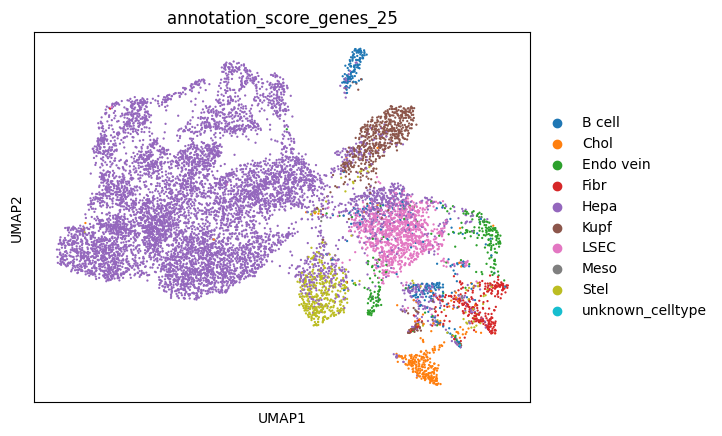

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
                  annotation_score_genes_25
B cell                             2.858924
Chol                               2.538297
Endo vein                          2.324546
Fibr                               2.502672
Hepa                              71.214820
Kupf                               5.504097
LSEC                               9.164589
Meso                               0.062344
Stel                               3.794086
unknown_celltype                   0.035625


In [5]:
# Original score_genes with basic marker gene list
mg_dict, scoresper_cluster = score_genes_bins(
    sdata = sdata,
    path_marker_genes = path_mg,
    bins = 25)
visualize_classification(sdata,'annotation_score_genes_25','umap_23_15',path_mg,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

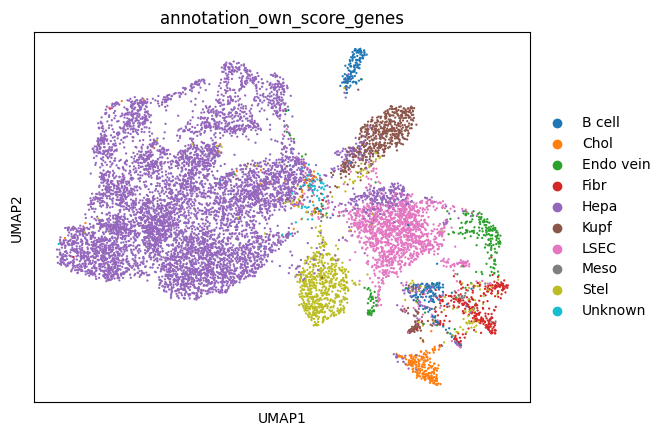

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       2.475953
Chol                         2.280014
Endo vein                    2.110794
Fibr                         2.707517
Hepa                        64.410403
Kupf                         5.860349
LSEC                        12.762736
Meso                         0.409690
Stel                         6.376915
Unknown                      0.605629


Hepa      LSEC  Endo vein      Chol      Kupf      Stel      Fibr  \
0      0.518377  0.006058   0.030701  0.085765  0.021587       NaN  0.034497   
1           NaN  0.077458   0.003792       NaN  0.373149       NaN  0.231369   
2           NaN       NaN   0.001595       NaN  0.023841       NaN  0.232491   
3      0.195218       NaN        NaN  0.036456       NaN       NaN  0.122768   
4      0.248247       NaN        NaN  0.069145       NaN  0.052458  0.032160   
...         ...       ...        ...       ...       ...       ...       ...   
11223  0.322433       NaN        NaN  0.059235       NaN  0.054651  0.029201   
11224  0.516080       NaN        NaN  0.081015  0.065312  0.067269  0.041674   
11225  0.348373  0.007146        NaN  0.058203  0.049473       NaN       NaN   
11226       NaN  0.072516        NaN       NaN  0.062516  0.628982  0.337339   
11227  0.305568  0.292362   0.081682  0.058369  0.635198  0.117443  0.071625   

         B cell      Meso  
0           NaN       NaN  
1           NaN  0.492883  
2           NaN  0.672062  
3           NaN  0.214938  
4           NaN       NaN  
...         ...       ...  
11223       NaN       NaN  
11224       NaN       NaN  
11225       NaN       NaN  
11226       NaN       NaN  
11227  0.011332  0.008365  

[11228 rows x 9 columns]

In [6]:
# Own score genes with basic marker gene list
scores = own_score_genes(sdata,path_mg)
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',path_mg,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

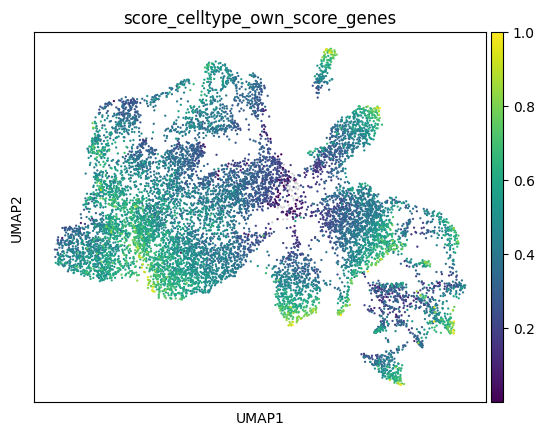

In [7]:
sc.pl.umap(sdata.table,color=['score_celltype_own_score_genes'])

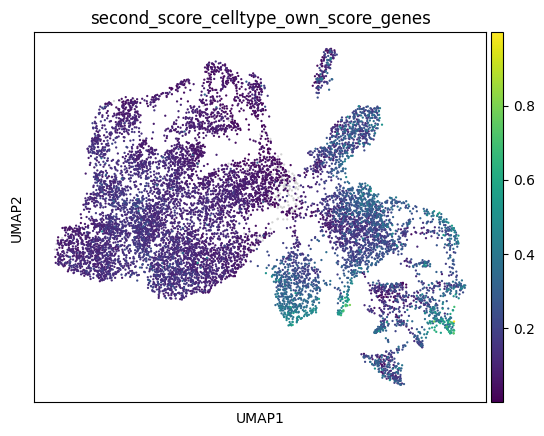

In [8]:
sc.pl.umap(sdata.table,color=['second_score_celltype_own_score_genes'])

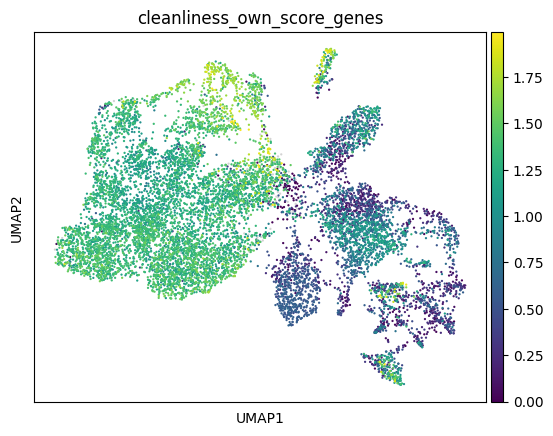

In [9]:
sc.pl.umap(sdata.table,color=['cleanliness_own_score_genes'])

Hepa          8.669
LSEC          9.333
Endo vein     7.250
Chol          7.500
Kupf         19.500
Stel         16.001
Fibr         17.625
B cell        4.500
Meso          6.000
dtype: float64


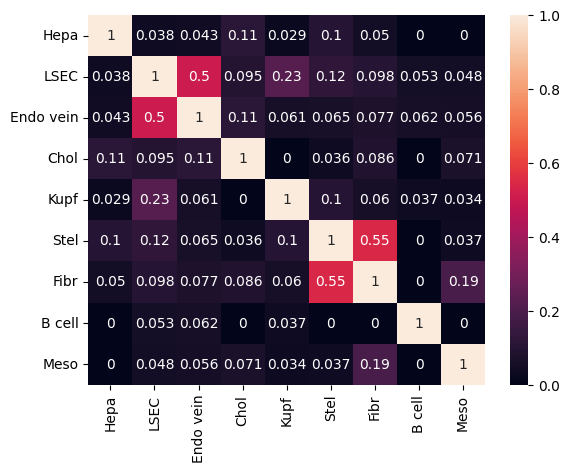

In [10]:
Jaccard_similarity_matrix(path_mg)

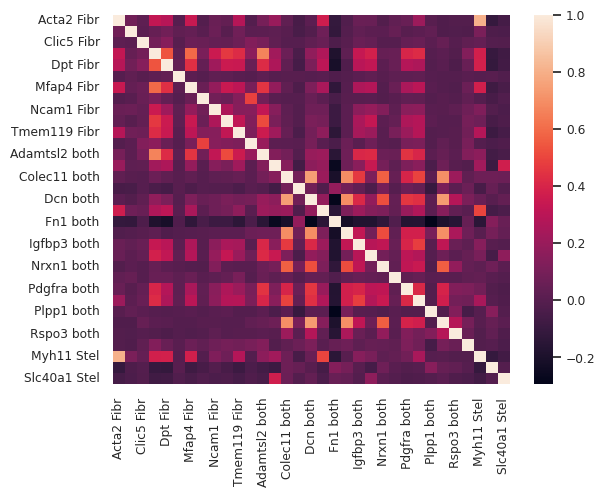

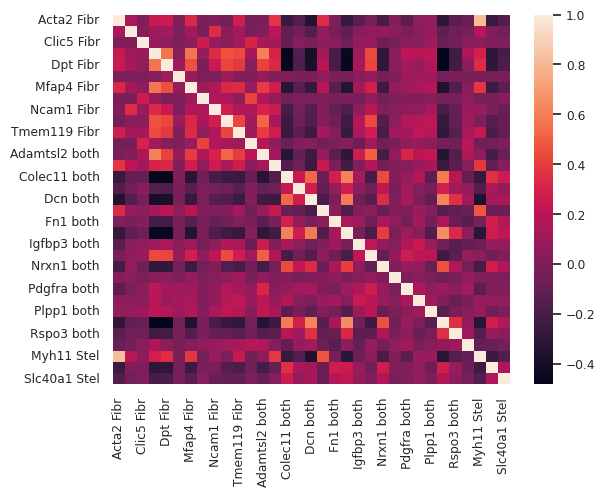

In [11]:
# plot correlation matrix of the gene expression of the marker genes of 2 confused cell types
# confusion between fibroblasts and stellate cells
# expression of all cells
sns.set(font_scale=0.8)
correlation_matrix_expression_marker_genes_of_2_cell_types(sdata.table,path_mg,'Fibr','Stel')
plt.show()
# expression of cells that are classified as fibroblasts or stellate cells
adata_sub = sdata.table[(sdata.table.obs['annotation_own_score_genes'] == 'Fibr') | (sdata.table.obs['annotation_own_score_genes'] == 'Stel'),:]
correlation_matrix_expression_marker_genes_of_2_cell_types(adata_sub,path_mg,'Fibr','Stel')

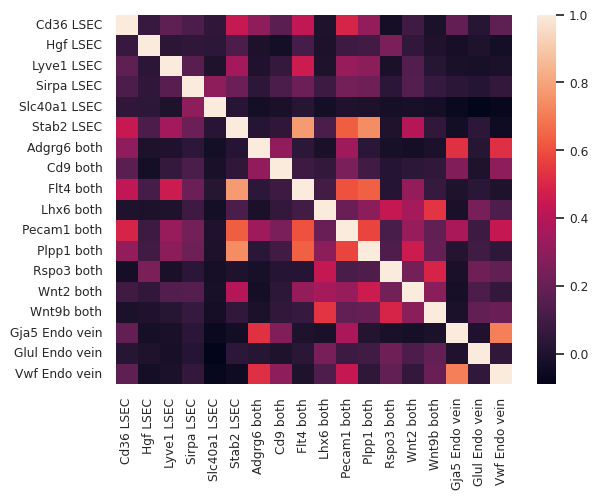

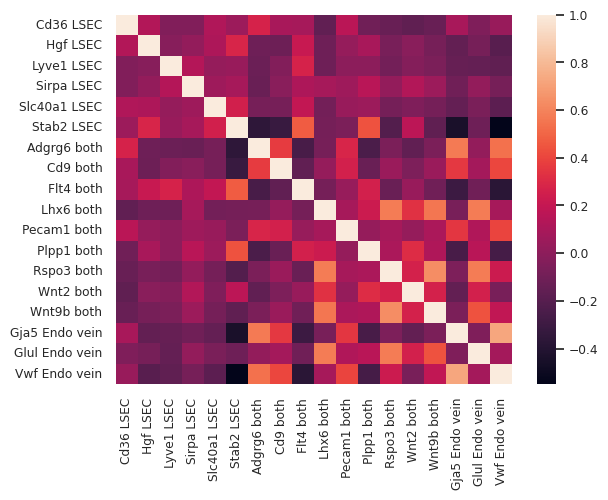

In [12]:
# plot correlation matrix of the gene expression of the marker genes of 2 confused cell types
# confusion between LSECs and Endo vein cells
# expression of all cells
correlation_matrix_expression_marker_genes_of_2_cell_types(sdata.table,path_mg,'LSEC','Endo vein')
plt.show()
# expression of cells that are classified as fibroblasts or stellate cells
adata_sub = sdata.table[(sdata.table.obs['annotation_own_score_genes'] == 'LSEC') | (sdata.table.obs['annotation_own_score_genes'] == 'Endo vein'),:]
correlation_matrix_expression_marker_genes_of_2_cell_types(adata_sub,path_mg,'LSEC','Endo vein')

<AxesSubplot: >

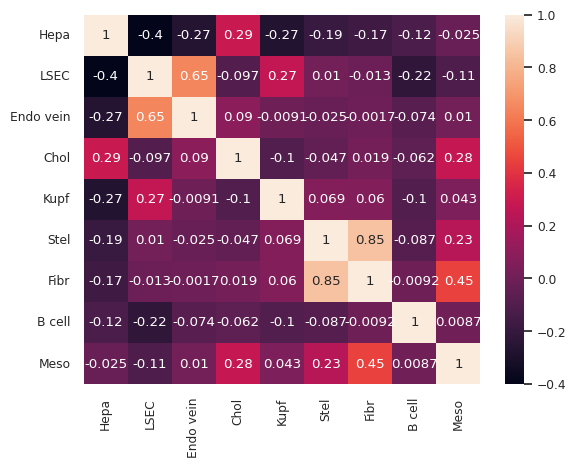

In [13]:
# plot correlation matrix of the features
sns.heatmap(scores.corr(method='pearson'), annot=True)
# sns.heatmap(scores_minmax.corr(method='pearson'), annot=True) gives the same heatmap

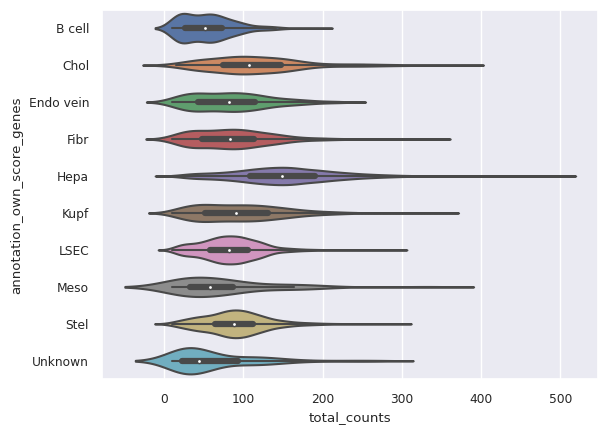

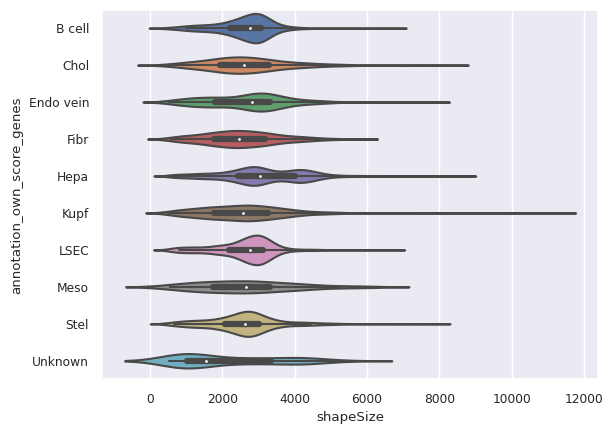

<AxesSubplot: xlabel='count_density', ylabel='annotation_own_score_genes'>

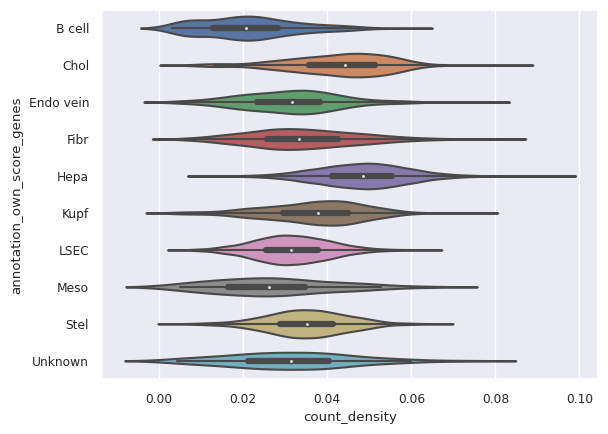

In [14]:
sns.violinplot(data=sdata.table.obs,x="total_counts",y="annotation_own_score_genes")
plt.show()
sns.violinplot(data=sdata.table.obs,x="shapeSize",y="annotation_own_score_genes")
plt.show()
sdata.table.obs['count_density'] = sdata.table.obs['total_counts'] / sdata.table.obs['shapeSize']
sns.violinplot(data=sdata.table.obs,x="count_density",y="annotation_own_score_genes")

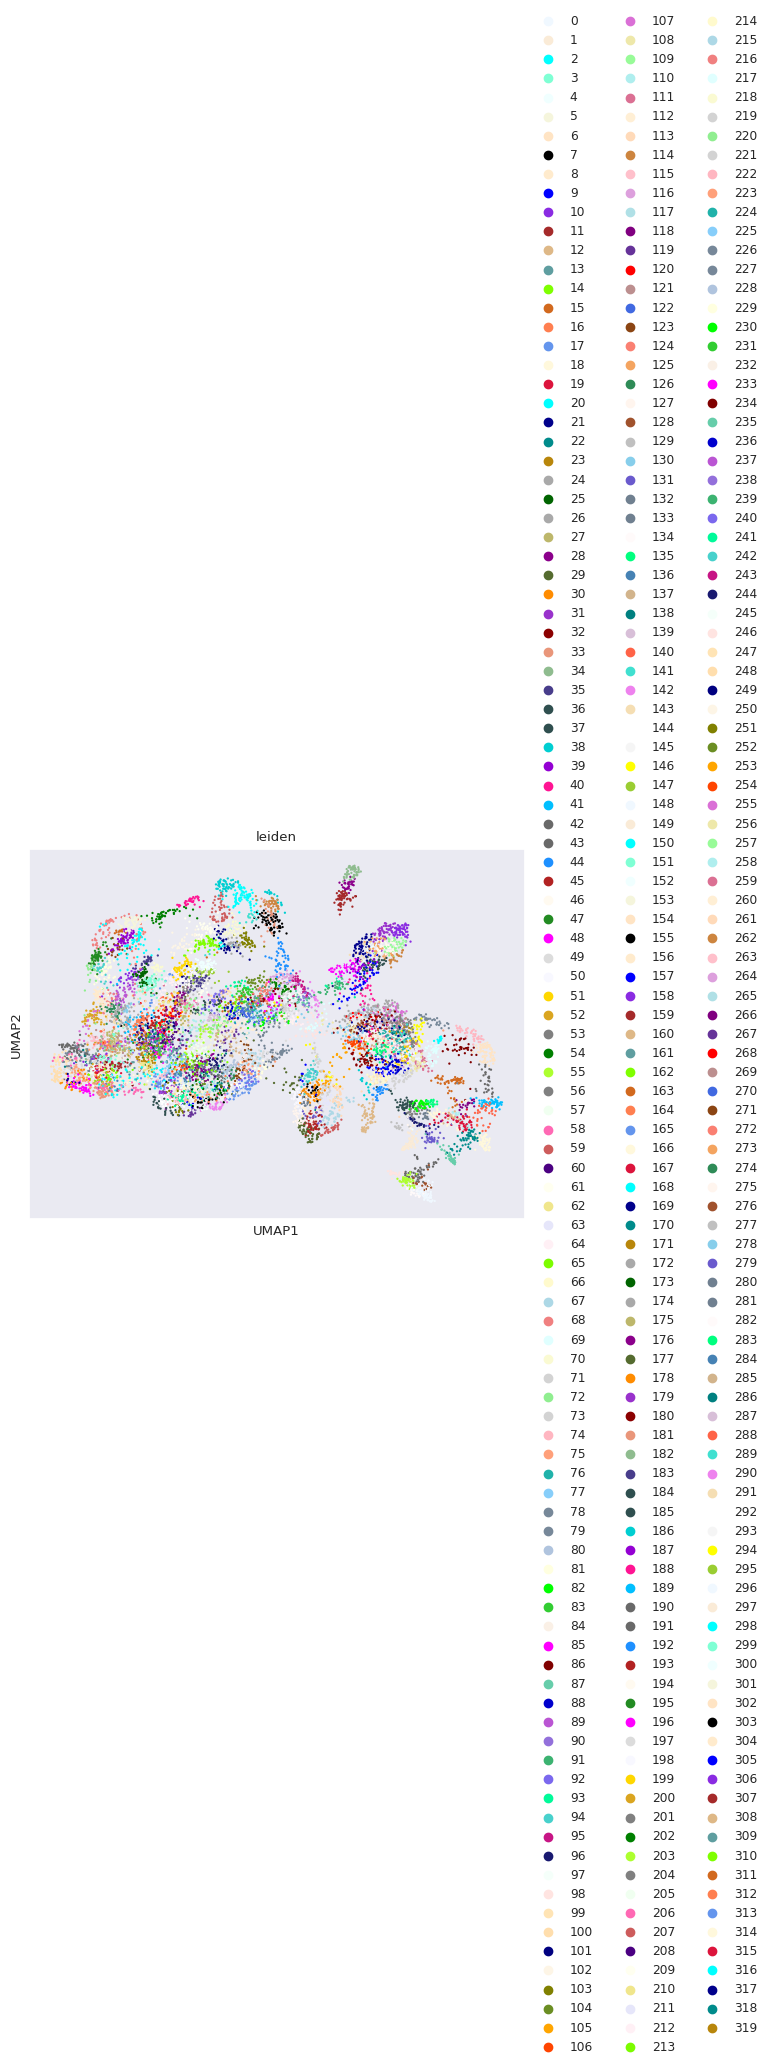

In [15]:
sc.tl.leiden(sdata.table,resolution=30,key_added='leiden')
sc.pl.umap(sdata.table,color='leiden',palette=list(matplotlib.colors.CSS4_COLORS.values()))

Index(['B cell', 'Chol', 'Endo vein', 'Fibr', 'Hepa', 'Kupf', 'LSEC', 'Meso',
       'Stel', 'Unknown'],
      dtype='object')
Hepa
[2, 3, 4, 5, 7, 8, 13, 14, 16, 17, 20, 23, 24, 25, 26, 27, 28, 33, 35, 38, 39, 42, 44, 47, 48, 49, 51, 52, 54, 57, 58, 59, 60, 61, 62, 64, 65, 68, 70, 72, 73, 75, 77, 78, 80, 81, 83, 84, 85, 89, 90, 92, 93, 95, 96, 97, 99, 100, 101, 102, 103, 104, 110, 112, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 126, 132, 133, 134, 136, 137, 138, 139, 142, 143, 144, 145, 147, 149, 150, 151, 152, 153, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 188, 189, 190, 193, 195, 196, 197, 200, 202, 203, 204, 205, 206, 208, 209, 210, 213, 214, 215, 216, 218, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 236, 237, 239, 240, 241, 242, 243, 245, 248, 249, 251, 252, 253, 254, 255, 257, 259, 263, 265, 267, 268, 269, 270, 271, 272, 273, 274, 277, 278, 284, 288, 

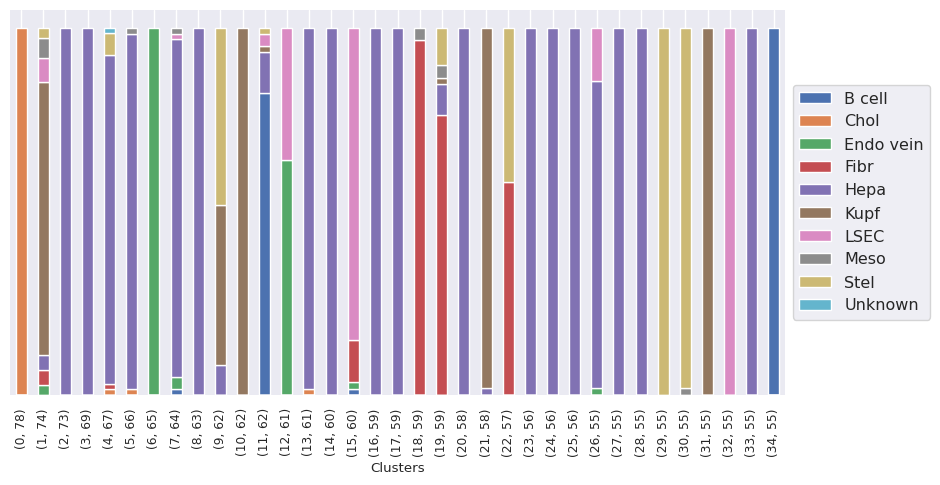

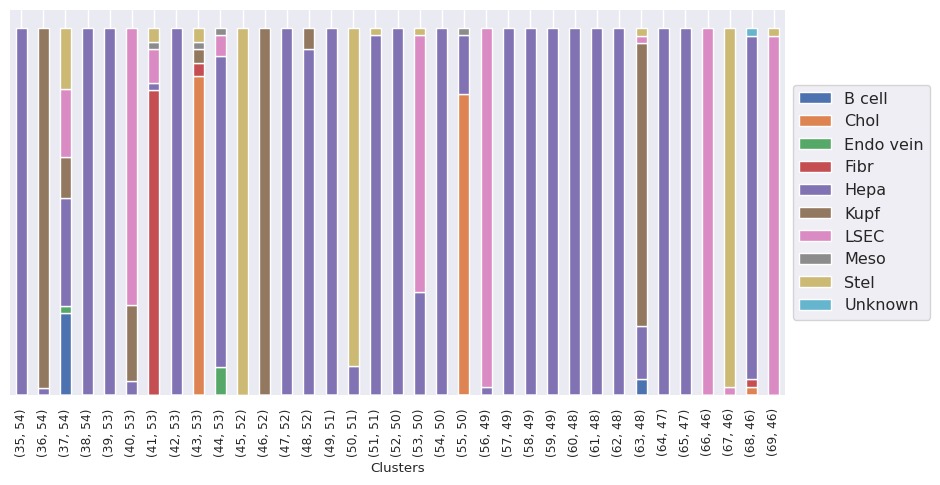

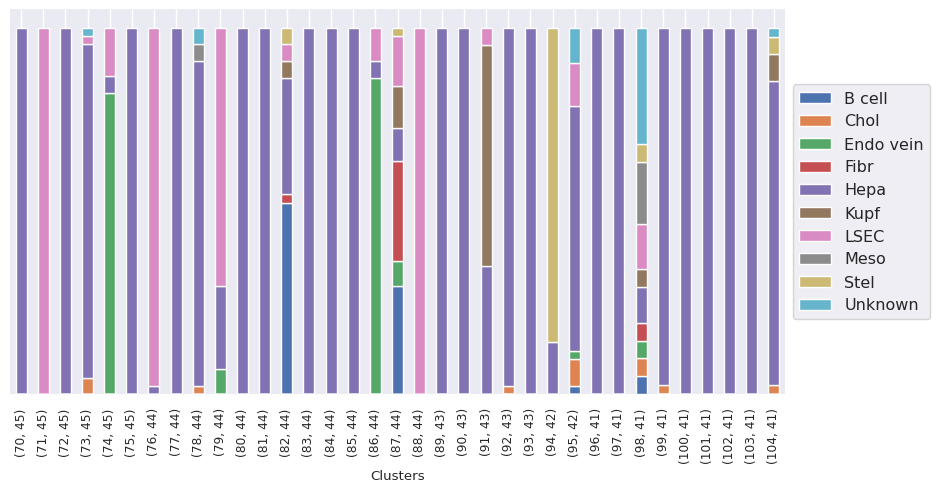

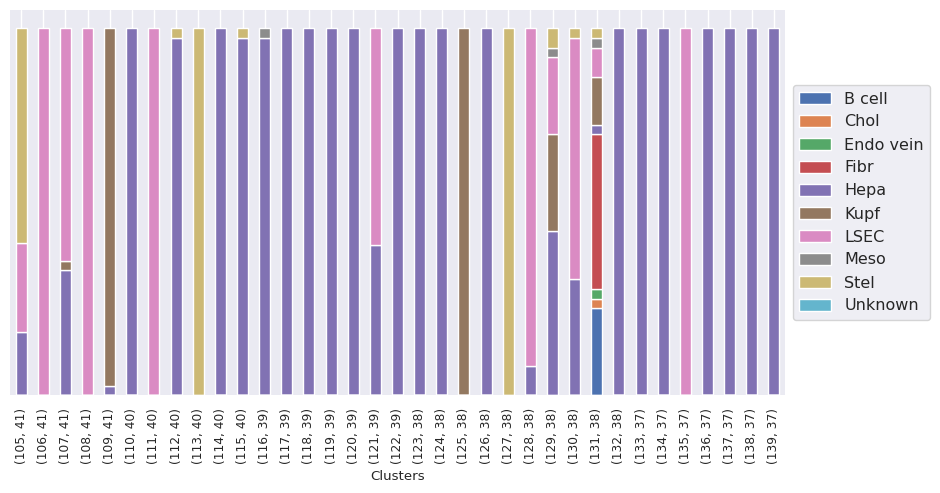

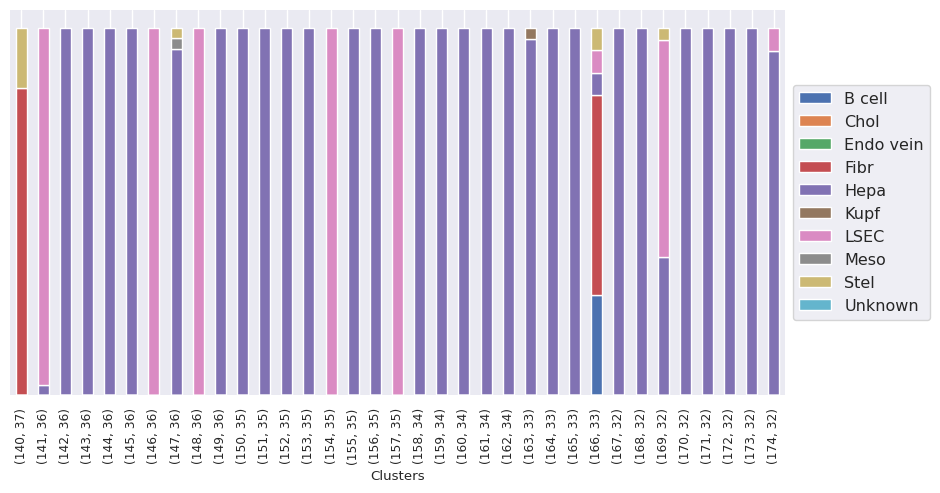

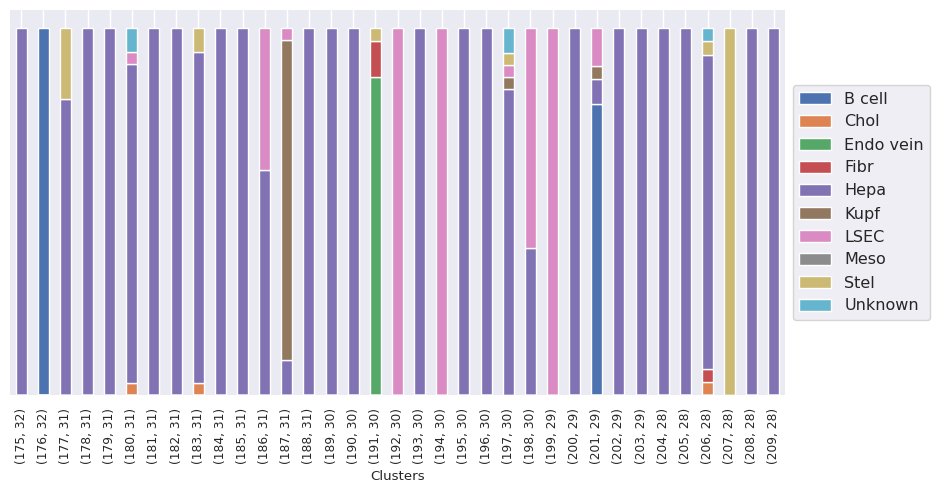

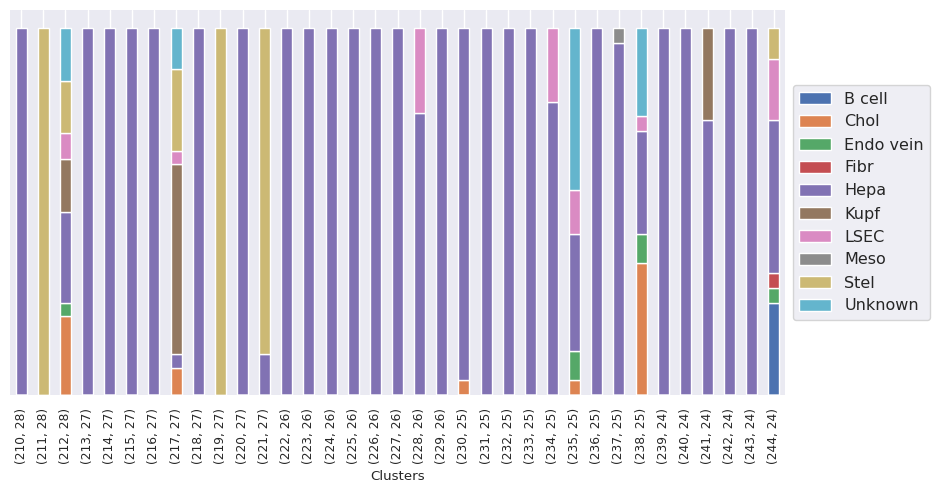

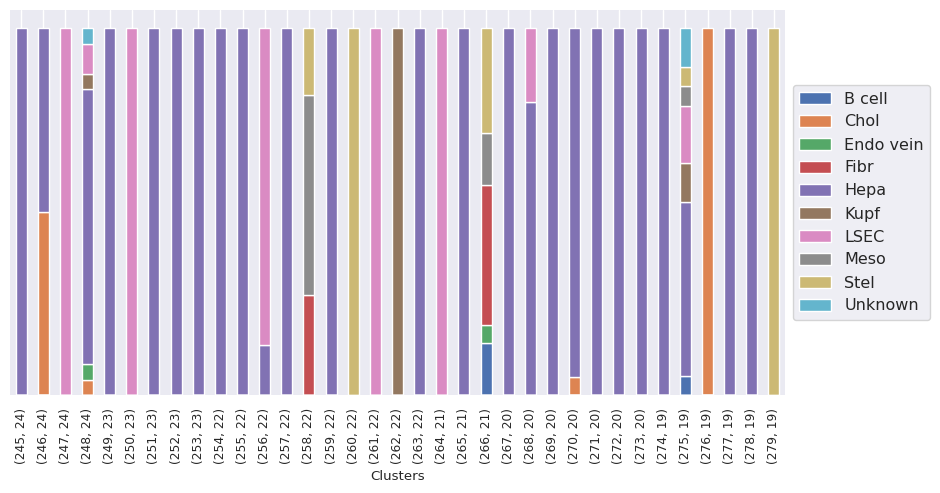

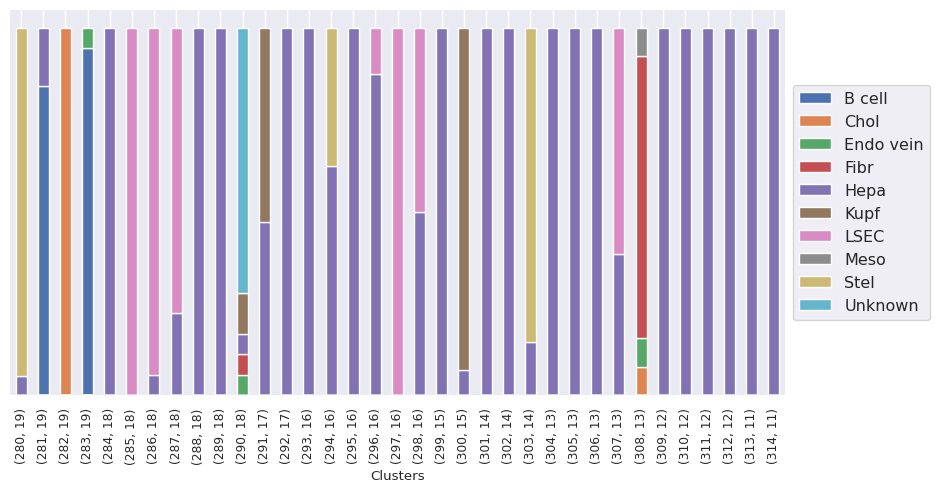

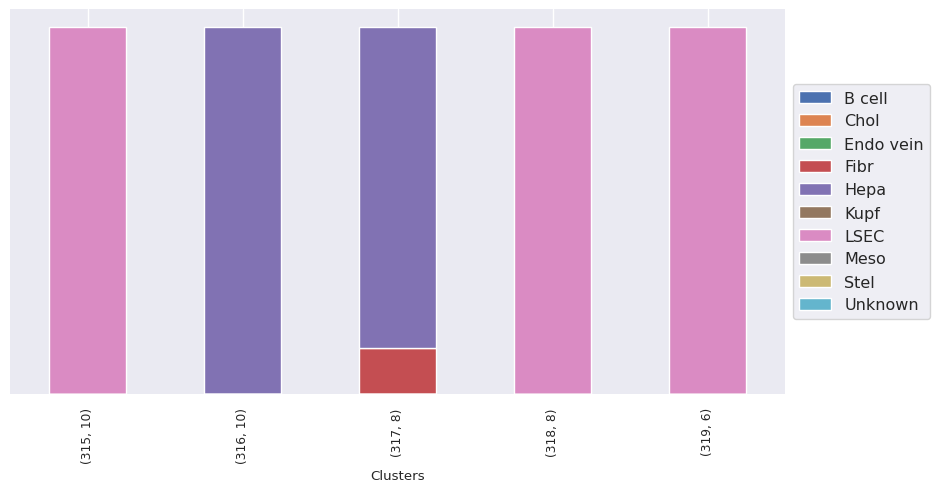

In [16]:
cell_types = ['Hepa','Kupf','LSEC','Endo vein','Fibr','Stel','Meso','Chol','B cell','Unknown']
leiden_clusters_per_ct = clusteringVSleiden(sdata.table, "annotation_own_score_genes", "leiden",cell_types)

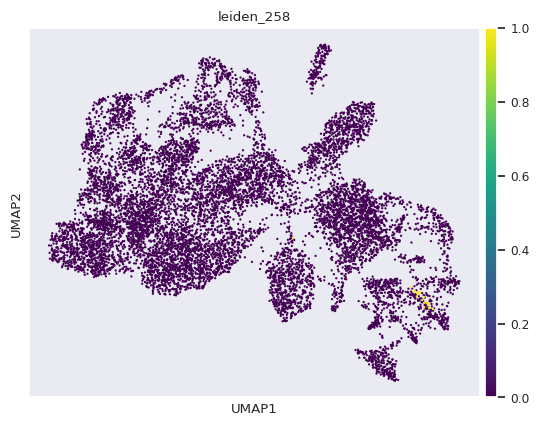

In [17]:
sdata.table.obs['leiden_258'] = (sdata.table.obs['leiden'] == '258').astype(int)
sc.pl.umap(sdata.table,color=['leiden_258'],color_map='viridis')

In [18]:
a = sdata.table.obs['leiden']
i = 0
for putative_leiden_clusters in leiden_clusters_per_ct:
    L = [str(x) for x in putative_leiden_clusters]
    for n in L:
        a = a.replace(n,cell_types[i])
    i += 1
sdata.table.obs['leiden_cell_types'] = a
# cells per leiden_cell_type cluster, to see the max number of n_cells you can take per cluster (149 in this case)
print(sdata.table.obs['leiden_cell_types'].value_counts())
min_cells_per_leiden_cell_type = sdata.table.obs['leiden_cell_types'].value_counts().min()
print(min_cells_per_leiden_cell_type)

Hepa         7054
LSEC         1399
Kupf          637
Stel          604
Unknown       477
Fibr          311
B cell        260
Endo vein     245
Chol          219
Meso           22
Name: leiden_cell_types, dtype: int64
22


Summary:
Hepa
Maybe drop:[['Glul', 'Endo vein']]
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Dcn', 'Stel']]
Stel
Maybe drop:[['Fn1', 'Hepa']]
Chol
Maybe drop:[['Fn1', 'Hepa']]
LSEC
Maybe drop:[['Sirpa', 'Kupf']]
Summary:
Fibr
Maybe drop:[['Fn1', 'Hepa']]
Stel
Maybe drop:[['Fn1', 'Hepa'], ['Lpl', 'Fibr']]
Chol
Maybe drop:[['Fn1', 'Hepa']]
Kupf
Maybe drop:[['Cd36', 'LSEC'], ['Lpl', 'Fibr'], ['Pecam1', 'B cell']]
Summary:
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Dcn', 'Stel']]
Stel
Maybe drop:[['Fn1', 'Hepa']]
Chol
Maybe drop:[['Fn1', 'Hepa']]
Kupf
Maybe drop:[['Cd36', 'LSEC']]
Summary:
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Dcn', 'Stel']]
Stel
Maybe drop:[['Fn1', 'Hepa']]
Chol
Maybe drop:[['Fn1', 'Hepa']]
LSEC
Maybe drop:[['Adgrg6', 'Endo vein']]
Summary:
Fibr
Maybe drop:[['Fn1', 'Hepa']]
Stel
Maybe drop:[['Fn1', 'Hepa']]
Chol
Maybe drop:[['Fn1', 'Hepa']]
Kupf
Maybe drop:[['Cd36', 'LSEC'], ['Plpp1', 'Endo vein'], ['Pecam1', 'B cell']]
Summary:
Hepa
Maybe drop:[['Glul', 'Endo vein']]
Fibr
Maybe drop:[['F

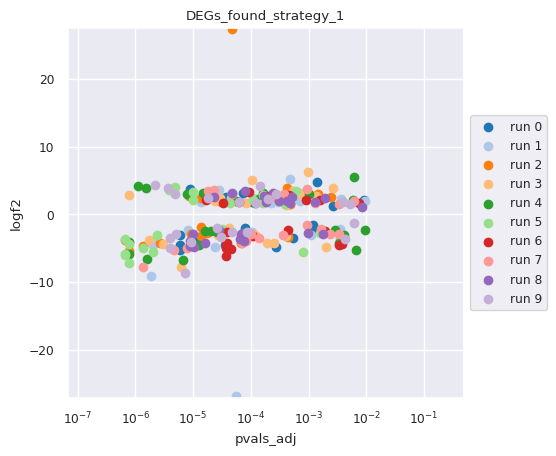

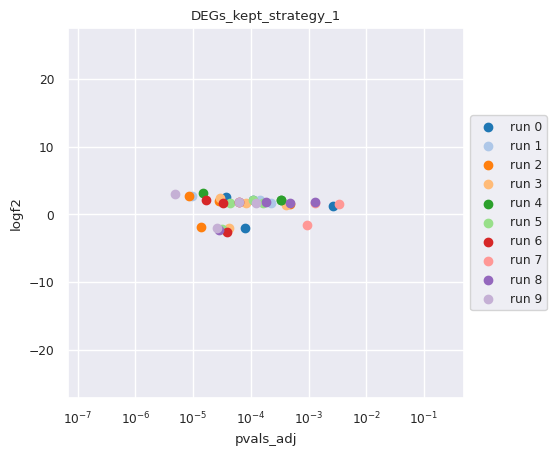

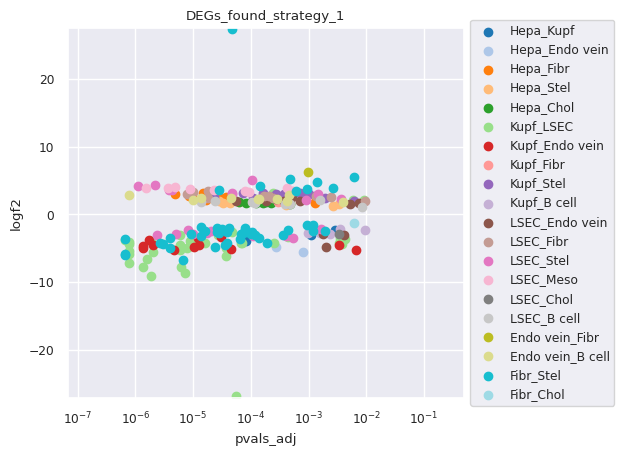

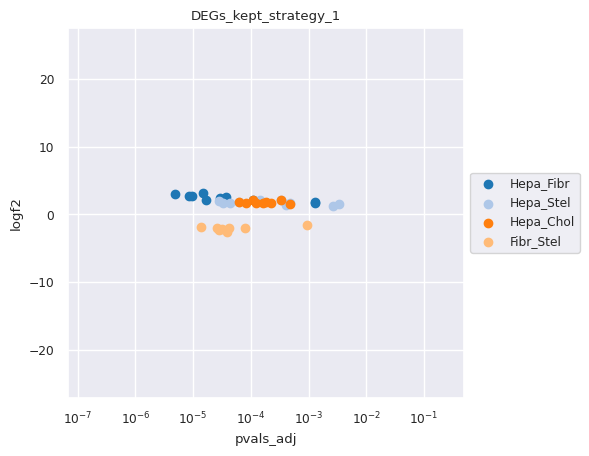

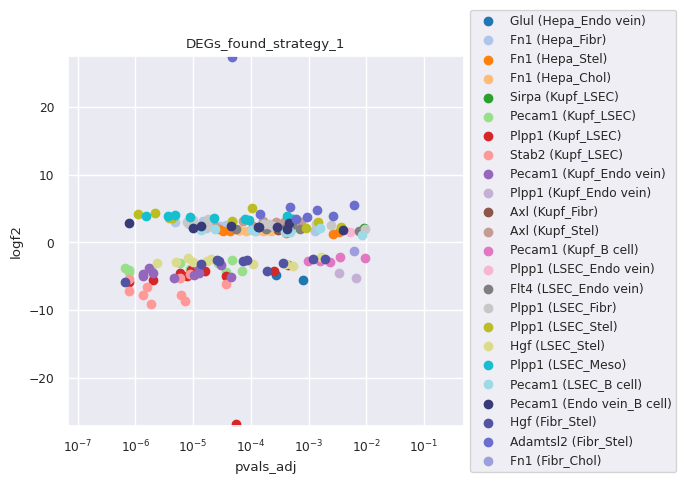

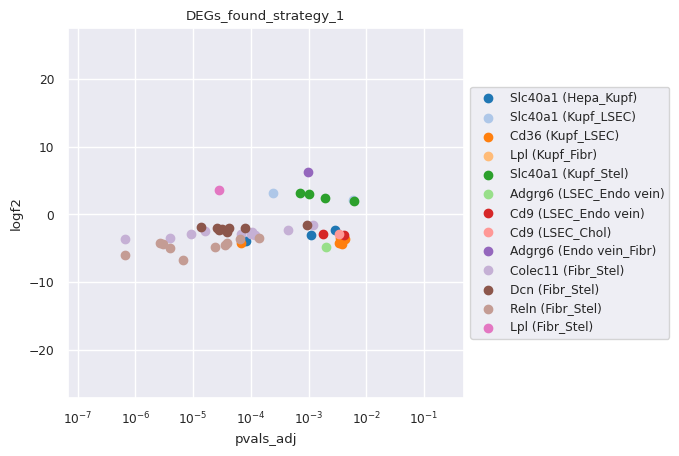

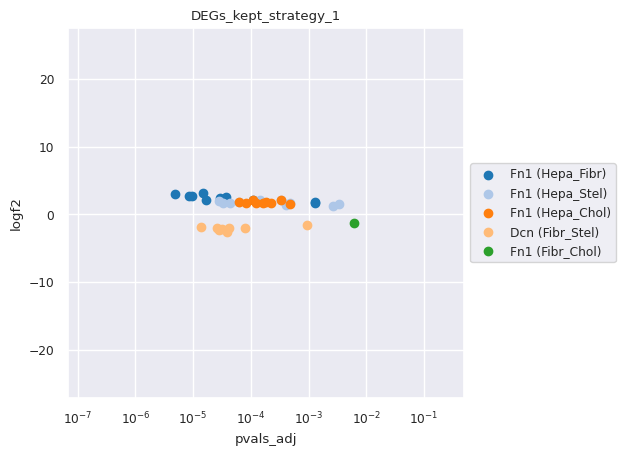

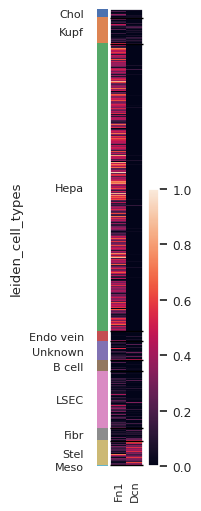

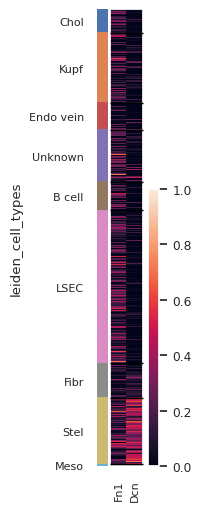

In [19]:
# STRATEGY 1 to change the marker gene list
results_strat1_10, results_runs1_10, DEG_details_runs1_10 = Apply_strategy_multiple_times(sdata.table,cell_types,leiden_clusters_per_ct,path_mg,10,min_cells_per_leiden_cell_type,1)

In [20]:
# Update marker gene list based on STRATEGY 1:
df_mg = pd.read_csv(path_mg,index_col=0)
keys = results_strat1_10.keys()
for key in keys:
    f = [x[0] for x in results_strat1_10[key]]
    f = np.unique(f).tolist()
    df_mg.loc[f,key] = 0
df_mg.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_modified1.csv")

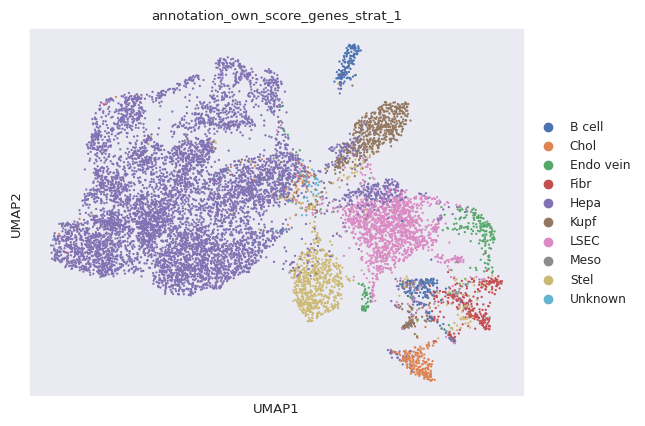

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes_strat_1
B cell                               2.467047
Chol                                 2.288921
Endo vein                            2.110794
Fibr                                 2.600641
Hepa                                64.552903
Kupf                                 5.833630
LSEC                                12.753830
Meso                                 0.409690
Stel                                 6.563947
Unknown                              0.418596


In [21]:
# Own score genes with modified marker gene list based on STRATREGY 1
path_mg_mod1 = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_modified1.csv"
scores = own_score_genes(sdata,path_mg_mod1,suffix='_strat_1')
visualize_classification(sdata,'annotation_own_score_genes_strat_1','umap_23_15',path_mg_mod1,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

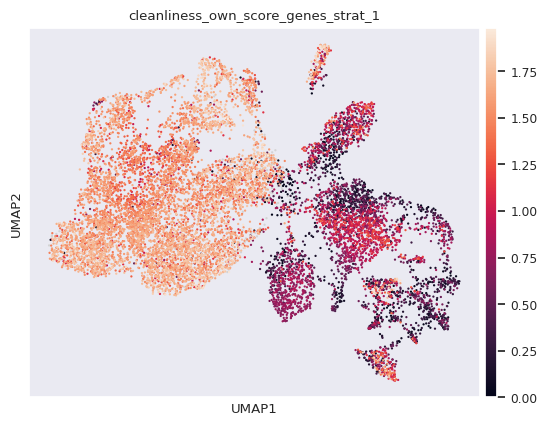

In [22]:
sc.pl.umap(sdata.table,color=['cleanliness_own_score_genes_strat_1'])

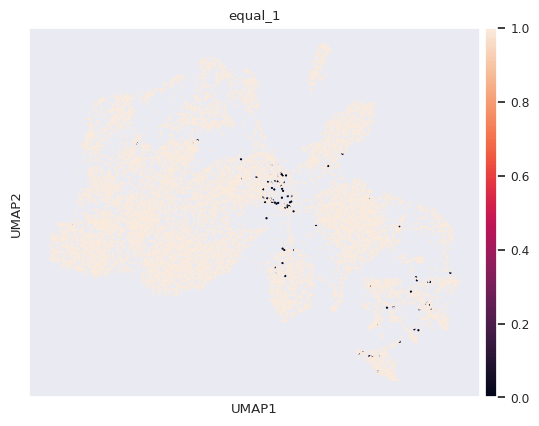

In [23]:
l = [sdata.table.obs['annotation_own_score_genes'].to_list()[i] == sdata.table.obs['annotation_own_score_genes_strat_1'].to_list()[i] for i in range(len(sdata.table.obs['annotation_own_score_genes'].to_list()))]
# list with True False to 0 1
sdata.table.obs['equal_1'] = [int(i) for i in l]
sc.pl.umap(sdata.table,color=['equal_1'])

Hepa          8.669
LSEC          9.333
Endo vein     7.250
Chol          6.500
Kupf         19.500
Stel         15.001
Fibr         15.625
B cell        4.500
Meso          6.000
dtype: float64


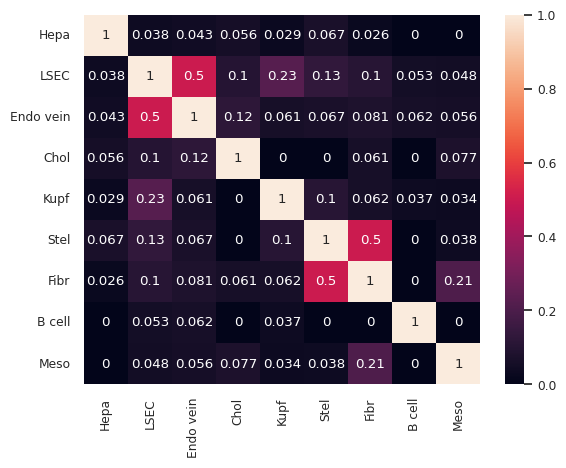

In [24]:
Jaccard_similarity_matrix(path_mg_mod1)

Adamtsl2
Is marker gene of: []
Could also be a marker gene of: ['Meso']
Cd36
Is marker gene of: []
Could also be a marker gene of: ['Endo vein']
Col1a1
Is marker gene of: ['Fibr']
Could also be a marker gene of: ['Meso']
Ngfr
Is marker gene of: []
Could also be a marker gene of: ['LSEC']
Spon2
Is marker gene of: []
Could also be a marker gene of: ['Meso']
Summary:
Meso
Maybe add:['Adamtsl2', 'Col1a1', 'Spon2']
Endo vein
Maybe add:['Cd36']
LSEC
Maybe add:['Ngfr']
Adamtsl2
Is marker gene of: []
Could also be a marker gene of: ['Meso']
Col1a1
Is marker gene of: ['Fibr']
Could also be a marker gene of: ['Meso']
Ghr
Is marker gene of: ['Hepa']
Could also be a marker gene of: ['Stel']
Spon2
Is marker gene of: []
Could also be a marker gene of: ['Meso']
Summary:
Meso
Maybe add:['Adamtsl2', 'Col1a1', 'Spon2']
Stel
Maybe add:['Ghr']
Adamtsl2
Is marker gene of: []
Could also be a marker gene of: ['Meso']
Col1a1
Is marker gene of: ['Fibr']
Could also be a marker gene of: ['Meso']
Myh11
Is marker 

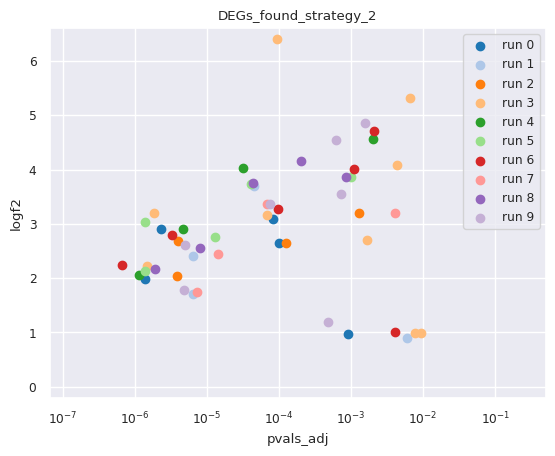

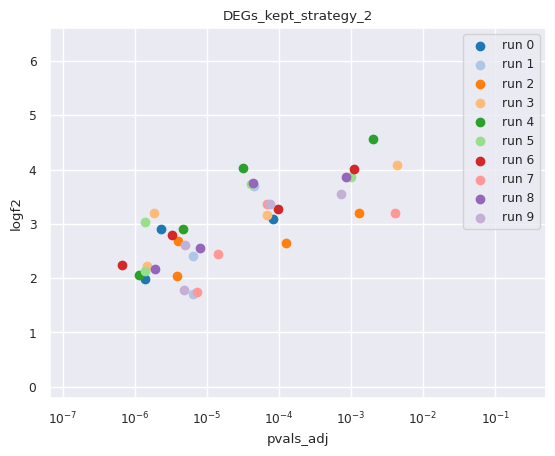

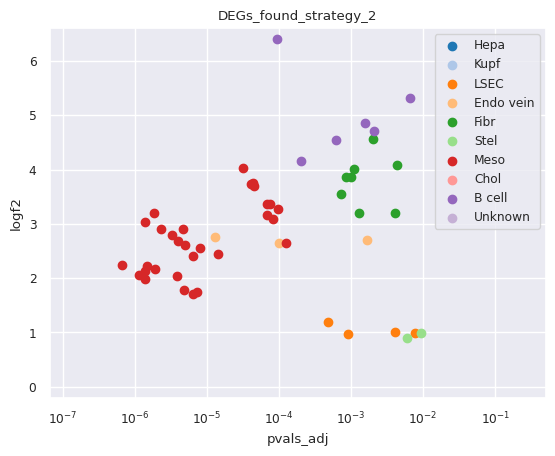

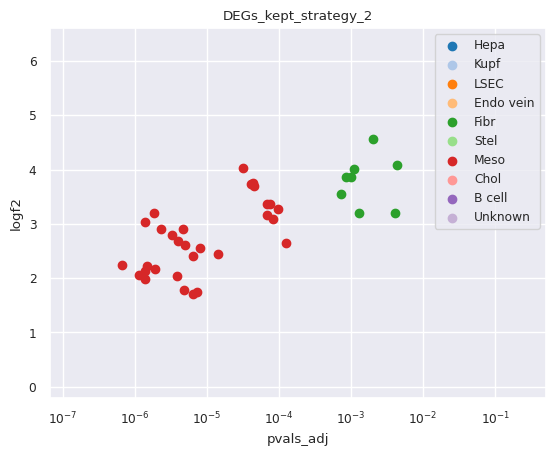

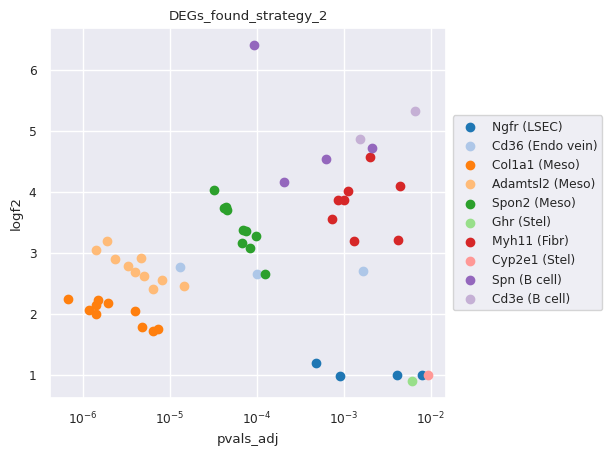

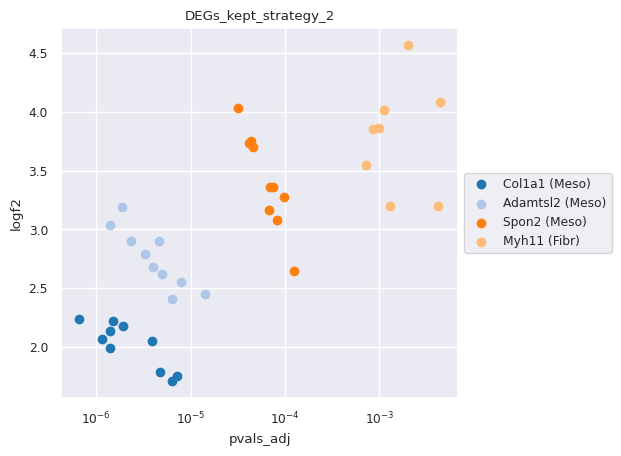

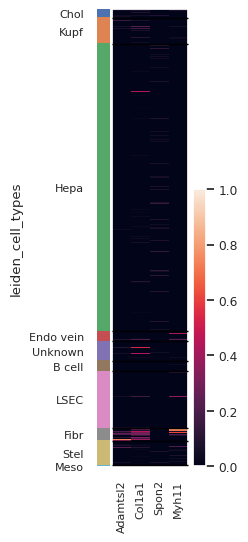

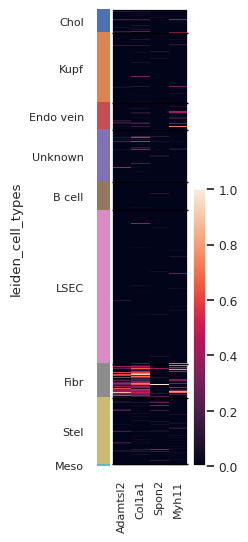

In [25]:
# STRATEGY 2 to change the marker gene list
results_strat2_10, results_runs2_10, DEG_details_runs2_10 = Apply_strategy_multiple_times(sdata.table,cell_types,leiden_clusters_per_ct,path_mg,10,min_cells_per_leiden_cell_type,2)

In [26]:
# Update marker gene list based on STRATEGY 2:
df_mg = pd.read_csv(path_mg,index_col=0)
keys = results_strat2_10.keys()
for key in keys:
    df_mg.loc[results_strat2_10[key],key] = 1
df_mg.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_modified2.csv")

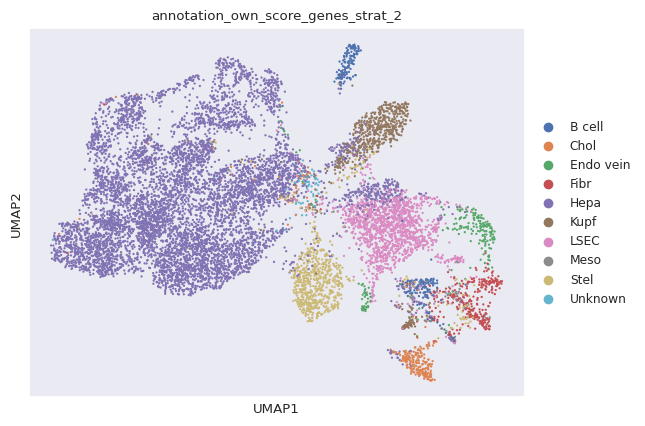

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes_strat_2
B cell                               2.475953
Chol                                 2.324546
Endo vein                            2.048450
Fibr                                 2.823299
Hepa                                64.428215
Kupf                                 5.860349
LSEC                                12.736017
Meso                                 0.409690
Stel                                 6.287852
Unknown                              0.605629


In [27]:
# Own score genes with modified marker gene list based on STRATREGY 2
path_mg_mod2 = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_modified2.csv"
scores = own_score_genes(sdata,path_mg_mod2,suffix='_strat_2')
visualize_classification(sdata,'annotation_own_score_genes_strat_2','umap_23_15',path_mg_mod2,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

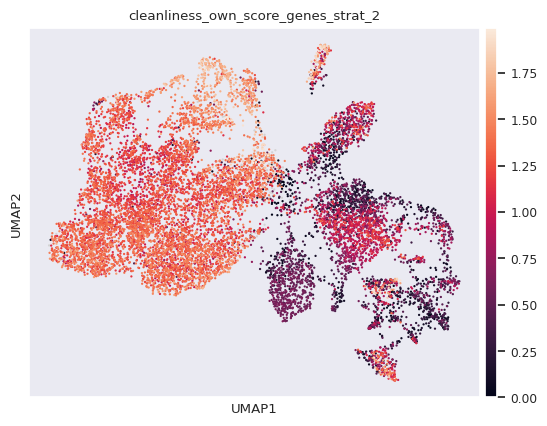

In [28]:
sc.pl.umap(sdata.table,color=['cleanliness_own_score_genes_strat_2'])
# makes sense that this becomes worse, because more marker genes overlap between cell types
# but does not mean that the annotation is worse

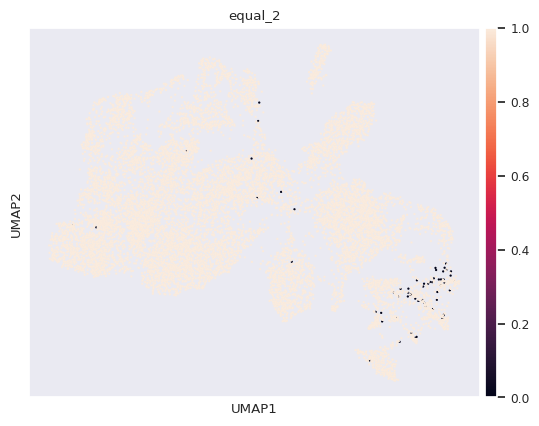

In [29]:
l = [sdata.table.obs['annotation_own_score_genes'].to_list()[i] == sdata.table.obs['annotation_own_score_genes_strat_2'].to_list()[i] for i in range(len(sdata.table.obs['annotation_own_score_genes'].to_list()))]
# list with True False to 0 1
sdata.table.obs['equal_2'] = [int(i) for i in l]
sc.pl.umap(sdata.table,color=['equal_2'])

Hepa          8.669
LSEC          9.333
Endo vein     7.250
Chol          7.500
Kupf         19.500
Stel         16.001
Fibr         18.625
B cell        4.500
Meso          9.000
dtype: float64


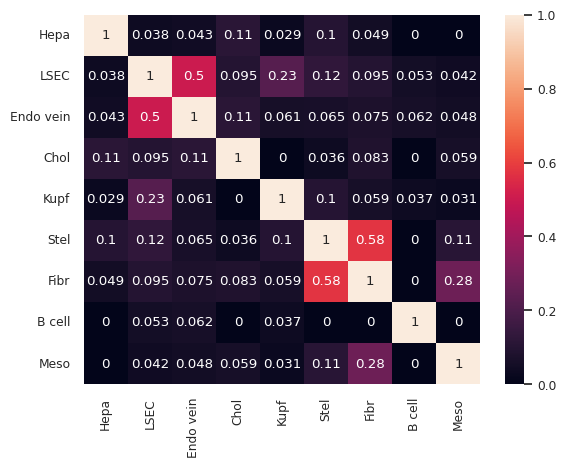

In [30]:
Jaccard_similarity_matrix(path_mg_mod2)

In [31]:
# STRATEGY 1 and STRATEGY 2 combined to change the marker gene list

In [32]:
# Update marker gene list based on STRATEGY 1 and STRATEGY 2:
df_mg = pd.read_csv(path_mg,index_col=0)
keys = results_strat1_10.keys()
for key in keys:
    f = [x[0] for x in results_strat1_10[key]]
    f = np.unique(f).tolist()
    df_mg.loc[f,key] = 0
keys = results_strat2_10.keys()
for key in keys:
    df_mg.loc[results_strat2_10[key],key] = 1
df_mg.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_modified_1_2.csv")

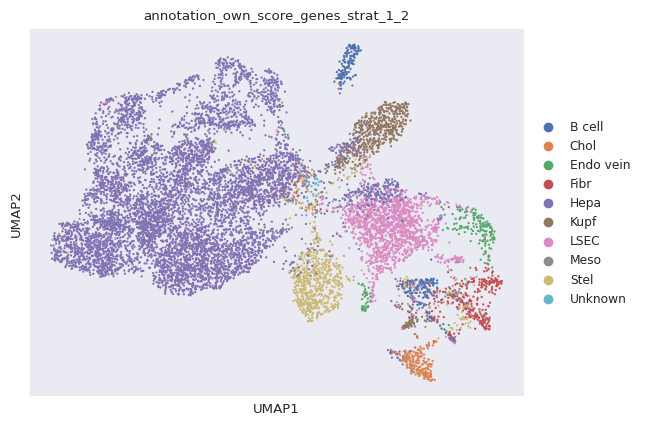

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes_strat_1_2
B cell                                 2.475953
Chol                                   2.342358
Endo vein                              2.039544
Fibr                                   2.707517
Hepa                                  64.579622
Kupf                                   5.833630
LSEC                                  12.727111
Meso                                   0.400784
Stel                                   6.474884
Unknown                                0.418596


In [33]:
# Own score genes with modified marker gene list based on STRATREGY 1 and STRATEGY 2
path_mg_mod_1_2 = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_modified_1_2.csv"
scores = own_score_genes(sdata,path_mg_mod_1_2,suffix='_strat_1_2')
visualize_classification(sdata,'annotation_own_score_genes_strat_1_2','umap_23_15',path_mg_mod_1_2,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

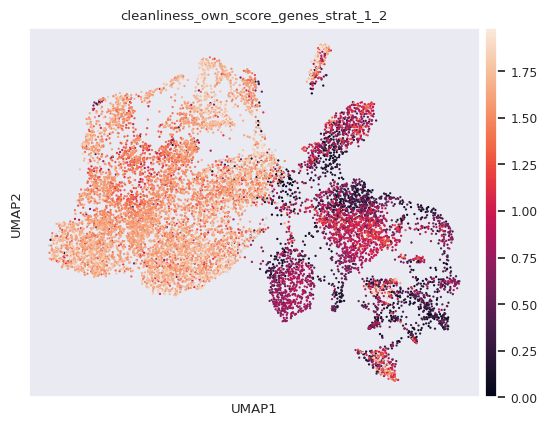

In [34]:
sc.pl.umap(sdata.table,color=['cleanliness_own_score_genes_strat_1_2'])

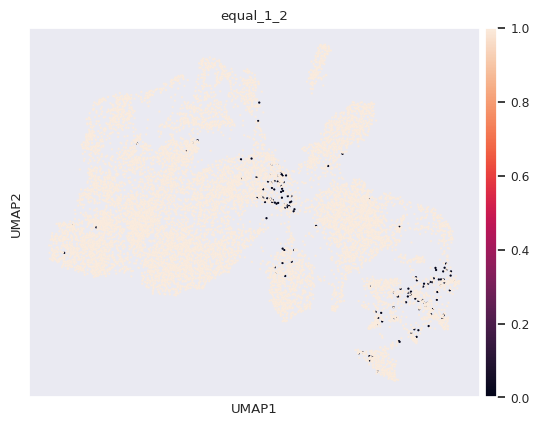

In [35]:
l = [sdata.table.obs['annotation_own_score_genes'].to_list()[i] == sdata.table.obs['annotation_own_score_genes_strat_1_2'].to_list()[i] for i in range(len(sdata.table.obs['annotation_own_score_genes'].to_list()))]
# list with True False to 0 1
sdata.table.obs['equal_1_2'] = [int(i) for i in l]
sc.pl.umap(sdata.table,color=['equal_1_2'])

Hepa          8.669
LSEC          9.333
Endo vein     7.250
Chol          6.500
Kupf         19.500
Stel         15.001
Fibr         16.625
B cell        4.500
Meso          9.000
dtype: float64


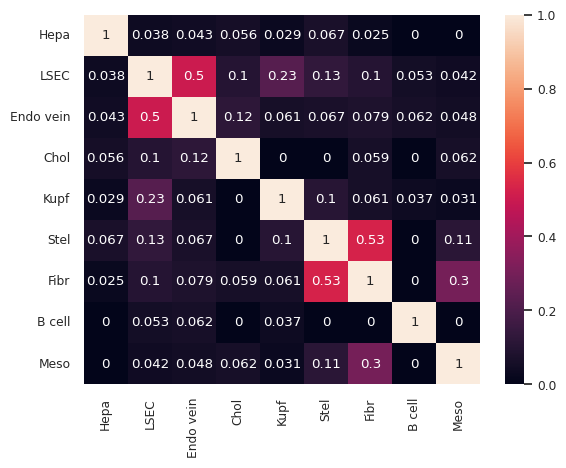

In [36]:
Jaccard_similarity_matrix(path_mg_mod_1_2)